In [71]:
#importing libraries
import warnings 
warnings.filterwarnings("ignore")

In [72]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Reading data from the csv
df1 = pd.read_csv('day.csv')
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
df1.shape

(730, 16)

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [76]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [77]:
#converting dteday from object to datetime 
from datetime import datetime 
df1['dteday'] = pd.to_datetime(df1['dteday'])
df1.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

## Data Quality Checks 

In [78]:
#checking for null values() 
df1.isnull().sum()
#no null values found, hence OK

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [79]:
#checking for duplicate rows 
df1_d = df1.copy()
df1_d.drop_duplicates(inplace = True)
df1_d.shape
#since the shape of dataframe after dropping duplicates is same as earlier, hence no duplicates present 

(730, 16)

In [80]:
#checking whether cnt = casual + registered for all columns 
df1[-(df1['cnt'] == df1['casual'] + df1['registered'])]
#no contradicting entries found, hence OK

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [81]:
# converting 'weathersit'column into categorical variable 
def convert_weathersit(x):
    return x.map({1:'T1', 2:'T2', 3:'T3'})

df1.weathersit = convert_weathersit(df1.weathersit)

In [82]:
df1.weathersit.value_counts()

T1    463
T2    246
T3     21
Name: weathersit, dtype: int64

In [83]:
# converting 'season'column into categorical variable 
def convert_season(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df1.season = convert_season(df1.season)

In [84]:
df1.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

## Removing Redundant Variables 
**dtedays:** As 'yr' and 'mnth' columns would suffice for analysis. 
**casual and registered:** As cnt is the target variable which is the sum of both. Also casual/registered is taken as a separate variable

In [85]:
df1_extract=df1[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]
df1_extract.shape

(730, 12)

## Data Visualization


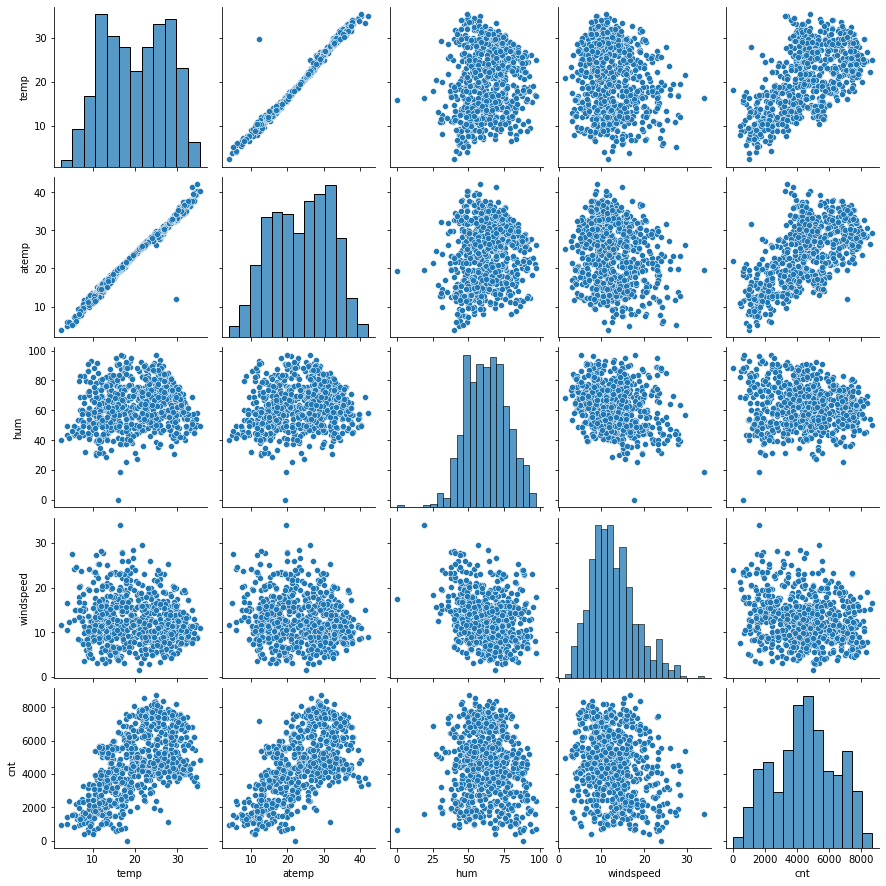

In [86]:
df_num=df1_extract[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num)
plt.show()

**Observation:** temp and atemp have a strong collinear relation with cnt. They may me collinear themselves as their scatterplot is very close to a straight line

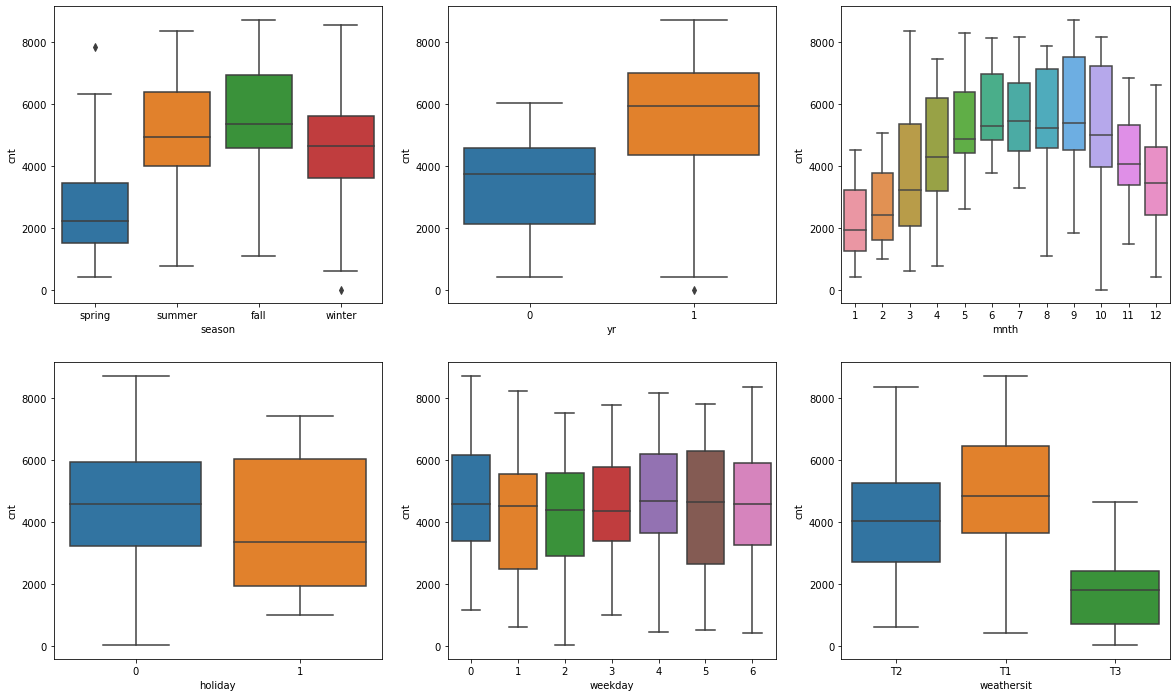

In [87]:
# plotting boxplots for visualizing categorical variables 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df1_extract)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df1_extract)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1_extract)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1_extract)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1_extract)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1_extract)
plt.show()

**Observations:** i)	Season: The target variable is affected by season. The demand is the highest in fall, followed by summer, winter and spring. 
ii)	Yr: There’s significant difference in demand between the two years. Year ‘1’ i.e. 2019 has higher demand compare to year ‘0’i.e. 2018.
iii)	Mnth: The initial and final months of the year have lower demand compared to the middle months. Even in high demand months, there is fluctuation in demand. Maximum demand is in month no. 7.
iv)	Holiday: Demand is higher on non-holidays compared to that on holidays.  
v)	Weekday: The demand is more or less constant on all weekdays.
vi)	Weathersit: The demand is the highest on Type 1 weather conditions (Clear, Few clouds, Partly cloudy) , moderate on Type 2 weather conditions(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and lowest during Type 3 weather conditions (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)


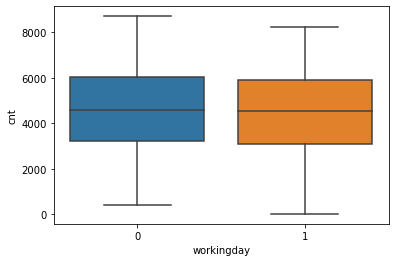

In [88]:
sns.boxplot(x = 'workingday', y = 'cnt', data = df1_extract)
plt.show()

plt.figure(figsize = (15,10))
sns.heatmap(df1_extract.corr(), annot = True, cmap="RdYlGn", annot_kws = {'size':10})
plt.show()

## Feature Engineering 
Creating new features <br>
**Quarter:** To assess quarterwise demand for bikes <br>
**Registered to Casual user ratio:** proportion of regular/registered users to casual users.<br>
**Feeling/actual temperature ratio:**<br>**Weather Comfort Index:** An index indicating suitability of weather conditions for physical activity. Formula = (temp+hum)/4<br>   

In [89]:
df_new = df1_extract
df_new['qtr'] = df_new['mnth']//4+1
df_new['rc_ratio']=round((df1['registered']/df1['casual']),1)
df_new['wci']=round((df_new['atemp']+df_new['hum'])/4,2)

In [90]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,qtr,rc_ratio,wci
0,spring,0,1,0,1,1,T2,14.110847,18.18125,80.5833,10.749882,985,1,2.0,24.69
1,spring,0,1,0,2,1,T2,14.902598,17.68695,69.6087,16.652113,801,1,5.1,21.82
2,spring,0,1,0,3,1,T1,8.050924,9.47025,43.7273,16.636703,1349,1,10.2,13.30
3,spring,0,1,0,4,1,T1,8.200000,10.60610,59.0435,10.739832,1562,1,13.5,17.41
4,spring,0,1,0,5,1,T1,9.305237,11.46350,43.6957,12.522300,1600,1,18.5,13.79


## Creating Dummy Variables 

In [91]:
# First 
df_new['weathersit']=df_new['weathersit'].astype('category')
df_new['season']=df_new['season'].astype('category')
df_new['mnth']=df_new['mnth'].astype('category')
df_new['weekday']=df_new['weekday'].astype('category')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  qtr         730 non-null    int64   
 13  rc_ratio    730 non-null    float64 
 14  wci         730 non-null    float64 
dtypes: category(4), float64(6), int64(5)
memory usage: 66.8 KB


In [92]:
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   qtr            730 non-null    int64  
 9   rc_ratio       730 non-null    float64
 10  wci            730 non-null    float64
 11  season_spring  730 non-null    uint8  
 12  season_summer  730 non-null    uint8  
 13  season_winter  730 non-null    uint8  
 14  mnth_2         730 non-null    uint8  
 15  mnth_3         730 non-null    uint8  
 16  mnth_4         730 non-null    uint8  
 17  mnth_5         730 non-null    uint8  
 18  mnth_6    

## Splitting the Data 

In [93]:
import sklearn 
from sklearn.model_selection import train_test_split

In [94]:
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 33)
(220, 33)


In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   atemp          510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   cnt            510 non-null    int64  
 8   qtr            510 non-null    int64  
 9   rc_ratio       510 non-null    float64
 10  wci            510 non-null    float64
 11  season_spring  510 non-null    uint8  
 12  season_summer  510 non-null    uint8  
 13  season_winter  510 non-null    uint8  
 14  mnth_2         510 non-null    uint8  
 15  mnth_3         510 non-null    uint8  
 16  mnth_4         510 non-null    uint8  
 17  mnth_5         510 non-null    uint8  
 18  mnth_6  

 ## Correlation Matrix 
 The correlation matrix shows variables which are highly correlated

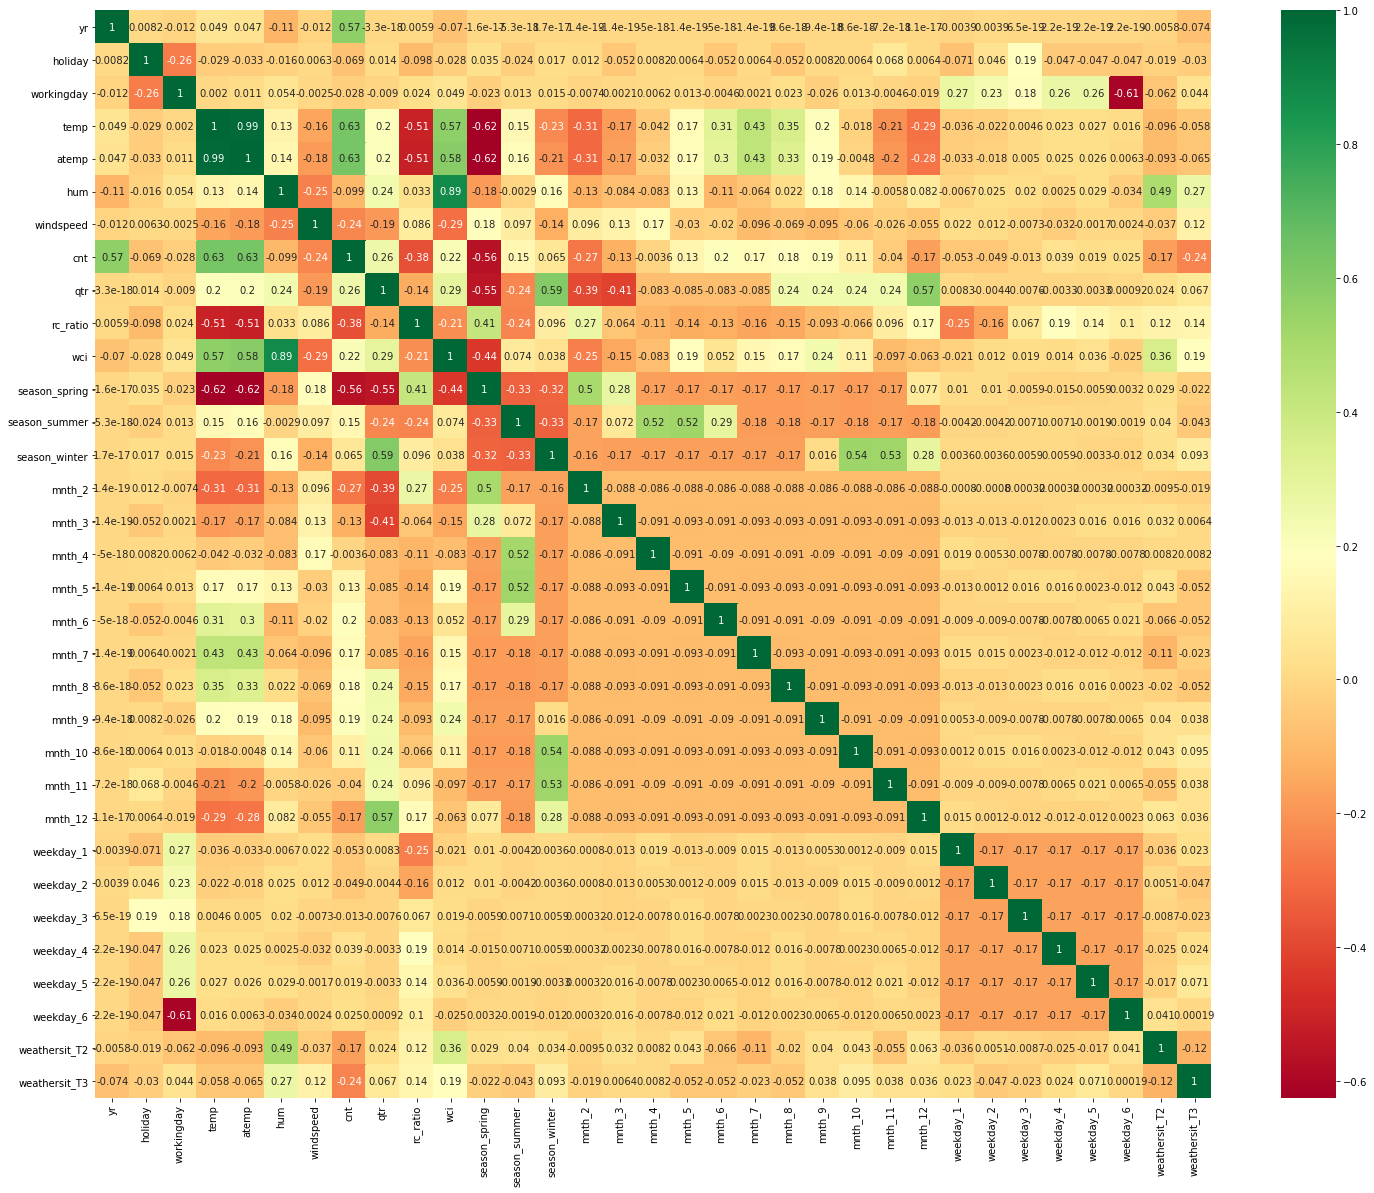

In [96]:
plt.figure(figsize = (25,20))
sns.heatmap(df_new.corr(), annot = True, cmap="RdYlGn")
plt.show()

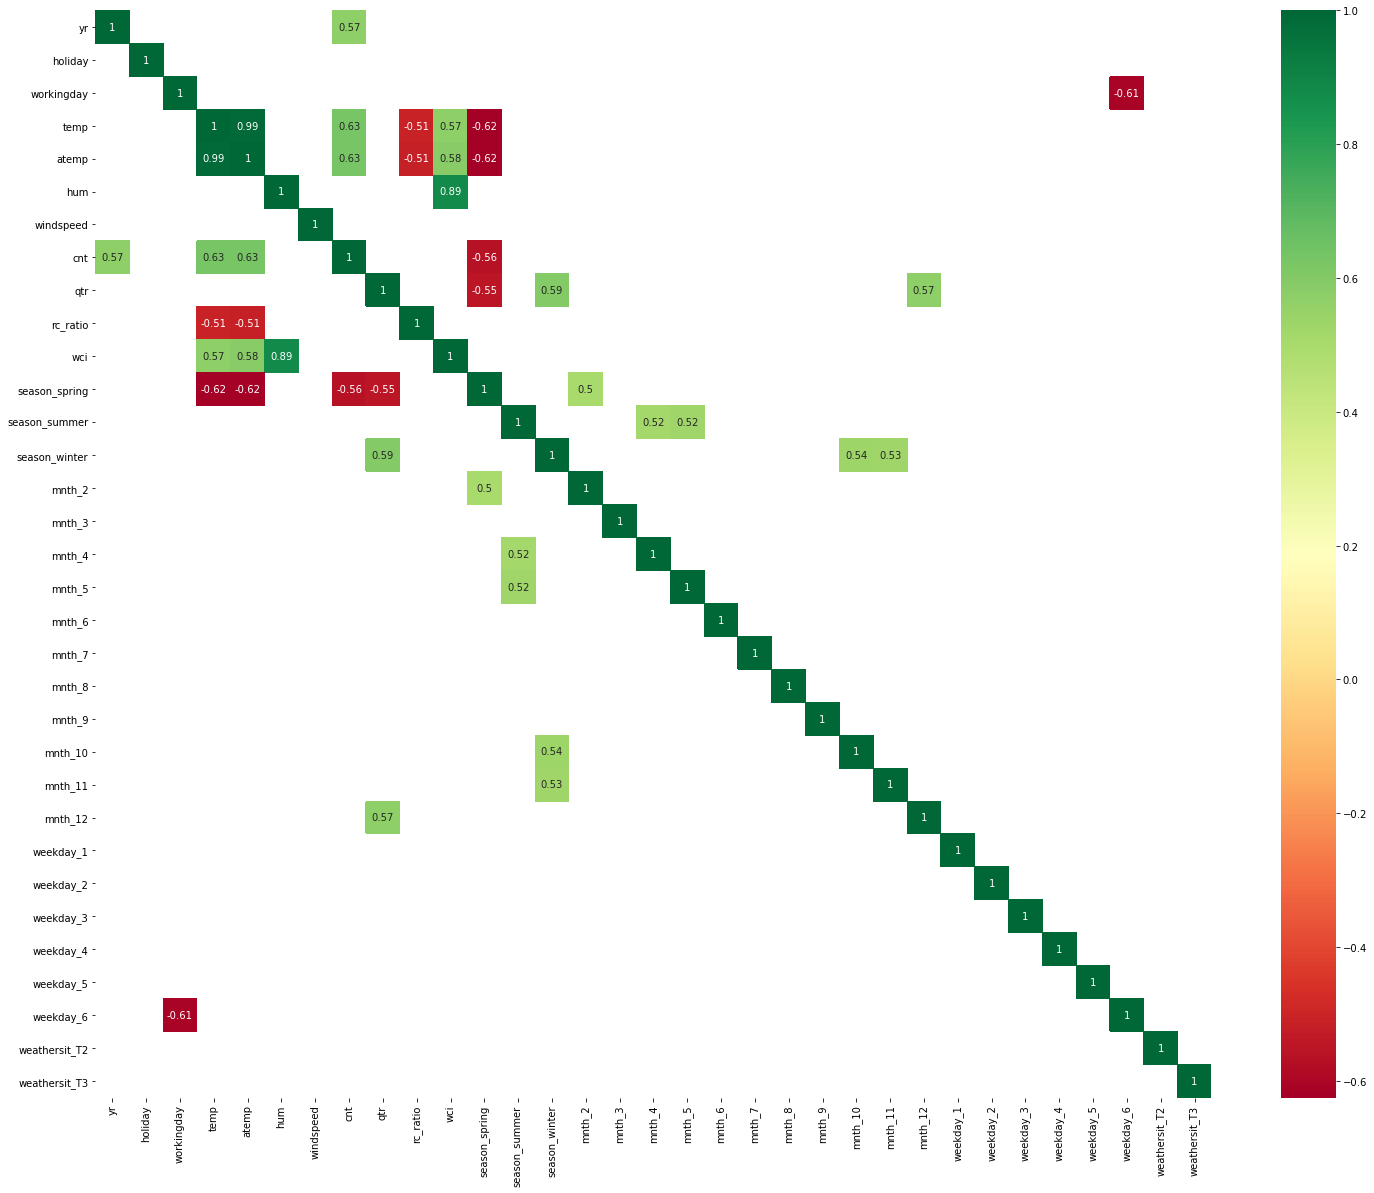

In [97]:
# For ease of understanding and relevance, only highly correlated variables are shown i.e. correlation coefficient > 0.5 
k = df_new.corr()[abs(df_new.corr()) > 0.5]
plt.figure(figsize = (25,20))
sns.heatmap(k, annot = True, cmap="RdYlGn")
plt.show()
#shades and intensity of green indicate positive correlation while those of red indicate negative correlation 

## Rescaling Features  

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler() 

In [100]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','qtr', 'rc_ratio', 'wci','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,qtr,rc_ratio,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_T2,weathersit_T3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.333333,0.074425,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.000000,0.031123,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,0.039242,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.333333,0.024357,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0.333333,0.101488,...,0,0,0,0,0,0,0,0,1,0


In [101]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,qtr,rc_ratio,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_T2,weathersit_T3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.420915,0.091273,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.310899,0.095056,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.035183,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.333333,0.063599,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.666667,0.109608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building 

In [102]:
y_train = df_train.pop('cnt')
X_train = df_train

## Recursive Feature Elimination 

In [103]:
# Importing RFE and LinearRegression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [104]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [105]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('qtr', True, 1),
 ('rc_ratio', False, 4),
 ('wci', True, 1),
 ('season_spring', False, 6),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 10),
 ('mnth_5', False, 7),
 ('mnth_6', False, 9),
 ('mnth_7', False, 16),
 ('mnth_8', False, 8),
 ('mnth_9', True, 1),
 ('mnth_10', False, 15),
 ('mnth_11', False, 2),
 ('mnth_12', True, 1),
 ('weekday_1', False, 3),
 ('weekday_2', False, 5),
 ('weekday_3', False, 17),
 ('weekday_4', False, 13),
 ('weekday_5', False, 14),
 ('weekday_6', False, 18),
 ('weathersit_T2', True, 1),
 ('weathersit_T3', True, 1)]

In [106]:
#Features with better RFE ranking are to be preferred in building the model 
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'qtr', 'wci',
       'season_summer', 'season_winter', 'mnth_3', 'mnth_9', 'mnth_12',
       'weathersit_T2', 'weathersit_T3'],
      dtype='object')

In [107]:
# Features with lower preference for model building 
X_train.columns[~rfe.support_]

Index(['workingday', 'rc_ratio', 'season_spring', 'mnth_2', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [108]:
# Creating X_test dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
# Ready to proceed for Model Building 

In [109]:
X_train_rfe

,yr,holiday,temp,atemp,hum,windspeed,qtr,wci,season_summer,season_winter,mnth_3,mnth_9,mnth_12,weathersit_T2,weathersit_T3
576,1,0,0.815169,0.766351,0.725633,0.264686,0.333333,0.822725,0,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.000000,0.620070,0,0,1,0,0,1,0
728,1,0,0.245101,0.200348,0.498067,0.663106,1.000000,0.396720,0,0,0,0,1,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.333333,0.474034,1,0,0,0,0,1,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0.333333,0.680984,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.824359,0.679690,0.187140,0.666667,0.800859,0,0,0,0,0,0,0
53,0,0,0.202618,0.218747,0.435939,0.111379,0.000000,0.344787,0,0,0,0,0,0,0
350,0,0,0.248216,0.223544,0.577930,0.431816,1.000000,0.481062,0,1,0,0,1,1,0
79,0,0,0.462664,0.434043,0.759870,0.529881,0.000000,0.731745,1,0,1,0,0,1,0


### Model 1

In [110]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,wci,960.09
4,hum,591.31
3,atemp,434.72
2,temp,370.44
6,qtr,15.99
5,windspeed,5.62
9,season_winter,3.75
12,mnth_12,2.97
13,weathersit_T2,2.38
0,yr,2.09


In [111]:
import statsmodels.api as sm  
#Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

#Creating Model 1 
lm1 = sm.OLS(y_train, X_train_rfe).fit()

In [112]:
lm1.params

const            13.242569
yr                0.229686
holiday          -0.100056
temp              0.510035
atemp           -32.359604
hum             -82.608332
windspeed        -0.193077
qtr               0.110221
wci              87.027171
season_summer     0.091242
season_winter     0.103684
mnth_3            0.043049
mnth_9            0.085723
mnth_12          -0.073515
weathersit_T2    -0.053331
weathersit_T3    -0.239197
dtype: float64

In [113]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.89e-188
Time:                        22:44:54   Log-Likelihood:                 512.87
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     494   BIC:                            -926.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.2426      5.305      2.496

**Observation**: 

**wci** has high p value as well as high VIF, hence wci should be dropped while building the next model 

### Model 2

In [114]:
#dropping wci from the train dataset
X_train_new = X_train_rfe.drop(["wci"], axis = 1)

In [115]:
# VIF Check
vif = pd.DataFrame()
X_train_new = X_train_new.drop(['const'], axis = 1)
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,370.43
3,atemp,363.94
6,qtr,15.99
4,hum,15.94
5,windspeed,3.80
8,season_winter,3.74
11,mnth_12,2.96
12,weathersit_T2,2.14
0,yr,2.02
7,season_summer,1.63


In [116]:
#Adding constant
X_train_lm2 = sm.add_constant(X_train_new)

#Creating Model 2 
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [117]:
# Checking parameters
lm2.params

const            0.224032
yr               0.230165
holiday         -0.097654
temp             0.514036
atemp           -0.004185
hum             -0.170728
windspeed       -0.192472
qtr              0.109578
season_summer    0.090027
season_winter    0.104308
mnth_3           0.043225
mnth_9           0.084259
mnth_12         -0.072735
weathersit_T2   -0.052607
weathersit_T3   -0.241099
dtype: float64

In [118]:
# Printing summary 
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.06e-188
Time:                        22:44:54   Log-Likelihood:                 509.78
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     495   BIC:                            -926.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2240      0.027      8.200

**Observation**: 

**atemp** has high p value as well as high VIF, hence it should be dropped while building the next model  

### Model 3 

In [119]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)

In [120]:
# VIF Check
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,qtr,15.84
3,hum,15.56
2,temp,15.12
4,windspeed,3.68
7,season_winter,3.62
10,mnth_12,2.94
11,weathersit_T2,2.14
0,yr,2.02
6,season_summer,1.59
8,mnth_3,1.49


In [121]:
#Adding constant
X_train_lm3 = sm.add_constant(X_train_new)

#Creating Model 2 
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [122]:
# Checking parameters
lm3.params

const            0.223989
yr               0.230168
holiday         -0.097629
temp             0.510107
hum             -0.170794
windspeed       -0.192330
qtr              0.109666
season_summer    0.089980
season_winter    0.104225
mnth_3           0.043224
mnth_9           0.084232
mnth_12         -0.072792
weathersit_T2   -0.052596
weathersit_T3   -0.241038
dtype: float64

In [123]:
# Printing summary 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.79e-189
Time:                        22:44:55   Log-Likelihood:                 509.78
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     496   BIC:                            -932.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2240      0.027      8.218

**Observation**: 

**qtr** has high VIF, hence it should be dropped while building the next model  

### Model 4

In [124]:
X_train_new = X_train_new.drop(["qtr"], axis = 1)

In [125]:
# VIF Check
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.53
2,temp,8.63
4,windspeed,3.67
10,weathersit_T2,2.13
0,yr,2.02
6,season_winter,1.80
5,season_summer,1.59
9,mnth_12,1.30
7,mnth_3,1.22
8,mnth_9,1.22


In [126]:
#Adding constant
X_train_lm4 = sm.add_constant(X_train_new)

#Creating Model 2 
lm4 = sm.OLS(y_train, X_train_lm4).fit()

In [127]:
# Checking parameters
lm4.params

const            0.222080
yr               0.228758
holiday         -0.096090
temp             0.573527
hum             -0.172880
windspeed       -0.189954
season_summer    0.089878
season_winter    0.143409
mnth_3           0.019134
mnth_9           0.107144
mnth_12         -0.009233
weathersit_T2   -0.050663
weathersit_T3   -0.237858
dtype: float64

In [128]:
# Printing summary 
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.10e-187
Time:                        22:44:56   Log-Likelihood:                 503.19
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     497   BIC:                            -925.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2221      0.028      8.053

**Observation**: 

**mnth_12** has high p value, hence it should be dropped while building the next model  

### Model 5

In [129]:
X_train_new = X_train_new.drop(["mnth_12"], axis = 1)

In [130]:
# VIF Check
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.62
2,temp,8.23
4,windspeed,3.67
9,weathersit_T2,2.11
0,yr,2.02
6,season_winter,1.72
5,season_summer,1.58
7,mnth_3,1.21
8,mnth_9,1.21
10,weathersit_T3,1.16


In [131]:
#Adding constant
X_train_lm5 = sm.add_constant(X_train_new)

#Creating Model 2 
lm5 = sm.OLS(y_train, X_train_lm5).fit()

In [132]:
# Checking parameters
lm5.params

const            0.220493
yr               0.228780
holiday         -0.095454
temp             0.576376
hum             -0.174502
windspeed       -0.189243
season_summer    0.090322
season_winter    0.142180
mnth_3           0.019913
mnth_9           0.107790
weathersit_T2   -0.050338
weathersit_T3   -0.236784
dtype: float64

In [133]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.33e-189
Time:                        22:44:57   Log-Likelihood:                 503.02
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     498   BIC:                            -931.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2205      0.027      8.041

**Observation**: 

**mnth_3** has high p value, hence it should be dropped while building the next model  

### Model 6

In [134]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [135]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.25
2,temp,8.01
4,windspeed,3.56
8,weathersit_T2,2.11
0,yr,2.01
6,season_winter,1.66
5,season_summer,1.58
7,mnth_9,1.21
9,weathersit_T3,1.16
1,holiday,1.04


In [137]:
#Adding constant
X_train_lm6 = sm.add_constant(X_train_new)

#Creating Model 2 
lm6 = sm.OLS(y_train, X_train_lm6).fit()

In [138]:
# Checking parameters
lm6.params

const            0.226132
yr               0.228910
holiday         -0.097453
temp             0.570769
hum             -0.175596
windspeed       -0.187000
season_summer    0.090651
season_winter    0.139117
mnth_9           0.106905
weathersit_T2   -0.050318
weathersit_T3   -0.235328
dtype: float64

In [139]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.32e-189
Time:                        22:46:43   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2261      0.027      8.331

**Observation**: 

**hum** has high VIF, hence it should be dropped while building the next model  

### Model 7

In [140]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [141]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_summer,1.57
7,weathersit_T2,1.48
5,season_winter,1.37
6,mnth_9,1.20
8,weathersit_T3,1.08
1,holiday,1.04


In [143]:
#Adding constant
X_train_lm7 = sm.add_constant(X_train_new)

#Creating Model 2 
lm7 = sm.OLS(y_train, X_train_lm7).fit()

In [144]:
lm7.params

const            0.125926
yr               0.232861
holiday         -0.098685
temp             0.548008
windspeed       -0.153246
season_summer    0.088080
season_winter    0.129345
mnth_9           0.101195
weathersit_T2   -0.078375
weathersit_T3   -0.282869
dtype: float64

In [145]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.83e-186
Time:                        22:49:04   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1259      0.017      7.508

**Observation**: 

All variables have p value = 0 and VIF < 5. Thus Model 7 is OK to proceed with. 

## Hypothesis Testing:
- Hypothesis testing states that:
       H0:B1=B2=...=Bn=0 
        H1:  at least one  Bi!=0 

**Observation** All lm7 model coefficient values are GREATER THAN ZERO.
**HENCE WE REJECT THE NULL HYPOTHESIS**

## F Statistic:
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
- Probability of F Statistic should be low and closer to 0 for model to be significant.
**Observation** F Statistic = 271.9, P(F Statistic) = 2.83e-186 ~ 0.000
    **HENCE THE OVERALL MODEL IS SIGNIFICANT**

## Residual Analysis 

In [149]:
y_train_pred = lm7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

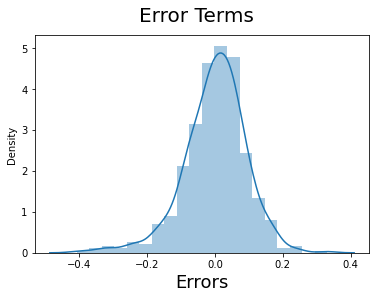

In [150]:
res = y_train-y_train_pred

# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

**Observation:** The error terms follow a normal distribution. This validates the assumption in linear regression that error terms are normally distributed.

## Multicollinearity Check

In [148]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_summer,1.57
7,weathersit_T2,1.48
5,season_winter,1.37
6,mnth_9,1.20
8,weathersit_T3,1.08
1,holiday,1.04


**Observation:** All VIFs are within <5. Thus the assumption of no multicollinearity stands validated.  

## Predictions on Final Model 

In [151]:
# scaling variables for test set using num_vars list defined earlier 
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,qtr,rc_ratio,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_T2,weathersit_T3
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0.333333,0.000000,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0.333333,0.108511,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0.666667,0.193617,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0.666667,0.072340,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0.333333,0.102128,...,0,0,0,0,0,0,0,1,0,0


In [152]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,qtr,rc_ratio,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_T2,weathersit_T3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.415152,0.140590,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.302824,0.152168,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.333333,0.059574,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.333333,0.097872,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,0.666667,0.164362,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
# Dividing df_test into y_test and X_test 

y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             220 non-null    int64  
 1   holiday        220 non-null    int64  
 2   workingday     220 non-null    int64  
 3   temp           220 non-null    float64
 4   atemp          220 non-null    float64
 5   hum            220 non-null    float64
 6   windspeed      220 non-null    float64
 7   qtr            220 non-null    float64
 8   rc_ratio       220 non-null    float64
 9   wci            220 non-null    float64
 10  season_spring  220 non-null    uint8  
 11  season_summer  220 non-null    uint8  
 12  season_winter  220 non-null    uint8  
 13  mnth_2         220 non-null    uint8  
 14  mnth_3         220 non-null    uint8  
 15  mnth_4         220 non-null    uint8  
 16  mnth_5         220 non-null    uint8  
 17  mnth_6         220 non-null    uint8  
 18  mnth_7  

In [155]:
#Selecting the variables that were part of final model.
col1 = X_train_new.columns

X_test=X_test[col1]

# Adding constant to test dataframe
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   yr             220 non-null    int64  
 2   holiday        220 non-null    int64  
 3   temp           220 non-null    float64
 4   windspeed      220 non-null    float64
 5   season_summer  220 non-null    uint8  
 6   season_winter  220 non-null    uint8  
 7   mnth_9         220 non-null    uint8  
 8   weathersit_T2  220 non-null    uint8  
 9   weathersit_T3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


In [156]:
# Making predictions using the final model (lm6)

y_pred = lm7.predict(X_test_lm7)

Text(0, 0.5, 'y_pred')

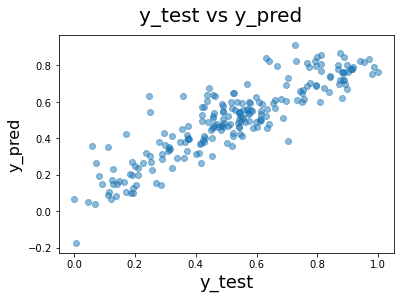

In [157]:
# Plotting y_test and y_pred to understand the actual distribution 

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## R2 Score of the model 

In [158]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7853417230030583

**Observation:** R2 score comes out to be 0.785 which is decent

## Adjusted R2 Score of the model 

Formula for Adjusted R^2

R2adj.=1−(1−R2)∗(n−1/n−p−1)

In [160]:
r2=r2_score(y_test, y_pred)


n = X_test.shape[0] # number of rows in X
p = X_test.shape[1] # number of features (predictors, p) is the shape along axis 1

# Calculating Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7761420825603322

## Final Evaluation 

**Train R2:** 0.830
**Train Adjusted R2:** 0.827
**Test R2:** 0.785
**Test Adjusted R2:** 0.776 
All values are decent, hence the model is good to go 

## Model Interpretation 

**The factors governing the target variable 'cnt' are**

**const:** Constant indicates the demand when every other variable is ignored. Positive value of 0.125926 indicates that. 

**i)  yr:** The natural demand for bikes has risen over the year from 2018 to 2019. This is indicated by a positive coefficient value of 0.232861.  


**ii)  holiday:** The demand of bikes is low holidays. This is indicated by a negative coefficient of -0.098685. 

**iii) temp:** Temperature has a strong positive correlation with bike demand with a coefficient 0.548008. However, from ED, it must be noted that most of the tmeperature data points are in ambient range of 10 - 30 degrees. The relatiom may not hold good for very high temperatures where using a bike is not the best option.


**iv)  windspeed:** People tend not to use bikes on windy days. This is indicated by negative coefficient of -0.153246.

**v)  season_summer:** Summers are favourable for biking indicated by a positive coefficient 0.088080.

**vi)  season_winter:** Demand for bikes is higher in winter compared to summer. Thus winter are highly favorable for biking. This is indicated by a comparatively larger coefficient of 0.129345.

**vii)  mnth_9:** Month no. 9 i.e. September is most favourable for biking business. Coefficient 0.101195.

**viii)  weathersit_T2:** People tend not to use bikes in misty weathers, indicated by a negative coefficient of -0.078375.

**ix)  weathersit_T3:** Type 3 weathers are the most extreme and logically bike usage declines in this type of weather, supported by a strong negative coefficient of -0.282869.

### Recomendations 
**It is recommended that tenperature, weathersit_T3 i.e. extreme weather condition and natural yearly increase/expansion through promotion activities be given due importance due to their unmistakably high bearing on bike demand**  